#Simulation of M/M/1 Queue

M in M/M/1 represents exponential (or memoryless or Markovian)

We take an example of grocery store where customers come and purchase items.

Arrival of customers before a time 't' follows a poisson distribution. This makes inter-arrival time (times between two consecutive arrivals) to follow exponential distribution.

The first 'M' of M/M/1 represents inter-arrival time.

Grocery store has one counter to sell the items. It is denoted by '1' in M/M/1.

Service time (the time spent by a customer at counter for purchasing items and paying the bills) follows exponential distribution.

The second 'M' of M/M/1 represents the service time

M/M/1 Queue have infinite waiting room, therefore every customer will enter into the queue irrespective of congestion.

Service in M/M/1 queue is given according to FCFS basis.

In [ ]:
# Install Simpy version 2.3
!pip install simpy==2.3

     |████████████████████████████████| 1.8MB 5.2MB/s 
  Created wheel for simpy: filename=simpy-2.3-cp36-none-any.whl size=75233 sha256=6d55810970f6a4fe6126dc38bb0d7572ca6112a21398d302acfa46199c064468
  Stored in directory: /root/.cache/pip/wheels/eb/3d/8e/3d693275afad69bebf507de3149d7380d339db204199d691b5
Successfully built simpy


In [ ]:
# Importing the required libraries

# Importing Simpy for simulation
from SimPy.Simulation import *

# Importing Python random module for expovariate function to generate the random numbers
# seed is used to initialize the random number stream
from random import expovariate, seed

In [ ]:
# Class to generate the customers

# CustomerGenerator class is derived from the SimPy Process class.
class CustomerGenerator(Process):
    
    # Process Execution Method (PEM) for the clsss
    # Arguments taken by this method are: Number of customers to generate - MaxCustomers, Average inter-arrival time - AverageInterArrivalTime 
    # and Resource provided to each created customer - ServiceResource
    def generate_customers(self, MaxCustomers, AverageInterArrivalTime, ServiceResource):

        # Generate MaxCustomers      
        for i in range(MaxCustomers):
            
            # Customers named Buyer00, Buyer01 and so on
            c = Buyer(name = "Buyer%02d"%(i,))

            # Activate the customers to current time and with the service resource available.
            activate(c,c.arrives(b=ServiceResource))
                    
            # Generate exponential random variable using expovariate function. Argument to expovariate is rate of arrivals i.e. 1/av. inter-arrival time
            # It generates pseudo-random numbers.
            # Since inter-arrival time follows exponential distribution, Arrival Time follow poisson distribution
            t = expovariate(1.0/AverageInterArrivalTime)

            # holds for sometime (According to above generated exponentially distributed pseudo-random numbers) before generating the next customer.              
            yield hold,self,t

In [ ]:
# Class to define buyers' activities - Buyer comes to store, waits (if required), buys the items and leaves

# Buyer class is derived from the SimPy Process class
class Buyer(Process):

    # Process Execution Method (PEM) for the clsss   
    def arrives(self,b):

        # Arrival of a new buyer at current time                                
        ArrivalTime = now()
        ArrivalTimeList.append(ArrivalTime)

        # Print the occurance of arrival
        print ("%8.4f %s: I have reached at Grocery Store     "%(now(),self.name))
        
        # Request for the service. If buyers' queue is empty, this buyer can buy items otherwise buyer will wait in queue 
        yield request,self,b

        # Calculate the waiting time                          
        WaitingTime = now() - ArrivalTime

        # Print the waiting time
        print ("%8.4f %s: I have waited for %6.3f"%(now(),self.name,WaitingTime))

        # Defining service time. In M/M/1, service time follows exponential distribution.
        ServiceTime = expovariate(1.0/AverageServiceTime)
        
        ServiceTimeList.append(ServiceTime)
        # Buyer holds the counter according to his service time and purchase the items            
        yield hold,self,ServiceTime

        # he current customer completes service and the service counter becomes available for any remaining customers in the queue.
        # After purchasing, release the counter for next available buyer in queue
        yield release,self,b

        # Print the store exit time                         
        print ("%8.4f %s: My Shopping is Over      "%(now(),self.name))

In [ ]:
# Sample Example to simulate the M/M/1 queue with above defined poisson arrival process and exponential service time

MaximumBuyers = 15
SimulationTime = 200.0 # minutes                                     
AverageServiceTime=5.0 # minutes                      
MeanArrivalInterval= 8.0   # minutes

# List of Arrival Times
ArrivalTimeList = []

# List of service times for every buyer
ServiceTimeList = []


seed(1256)  

# Create a counter at grocery store
k = Resource(name="Counter",unitName="SuperMarket")       

initialize()
s = CustomerGenerator('CustomerGenerator')
activate(s,s.generate_customers(MaxCustomers=MaximumBuyers,AverageInterArrivalTime=MeanArrivalInterval, 
                      ServiceResource=k),at=0.0)           
simulate(until=SimulationTime)

  0.0000 Buyer00: I have reached at Grocery Store     
  0.0000 Buyer00: I have waited for  0.000
  0.6007 Buyer00: My Shopping is Over      
  6.3352 Buyer01: I have reached at Grocery Store     
  6.3352 Buyer01: I have waited for  0.000
 10.9730 Buyer02: I have reached at Grocery Store     
 18.8115 Buyer01: My Shopping is Over      
 18.8115 Buyer02: I have waited for  7.839
 20.4302 Buyer02: My Shopping is Over      
 21.7203 Buyer03: I have reached at Grocery Store     
 21.7203 Buyer03: I have waited for  0.000
 22.0517 Buyer03: My Shopping is Over      
 25.2717 Buyer04: I have reached at Grocery Store     
 25.2717 Buyer04: I have waited for  0.000
 31.3568 Buyer04: My Shopping is Over      
 33.1369 Buyer05: I have reached at Grocery Store     
 33.1369 Buyer05: I have waited for  0.000
 43.9626 Buyer05: My Shopping is Over      
 50.6089 Buyer06: I have reached at Grocery Store     
 50.6089 Buyer06: I have waited for  0.000
 52.3421 Buyer06: My Shopping is Over      
 64.81

'SimPy: No more events at time 140.04882184668045'

# Poisson Arrival Process Simulation

Text(0, 0.5, 'Arrival Time')

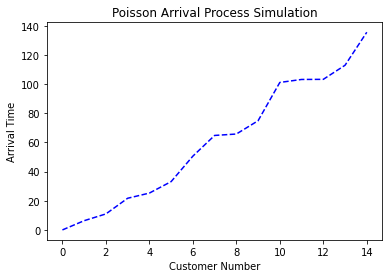

In [ ]:
import matplotlib.pyplot as plt

plt.plot(ArrivalTimeList,'b--')
plt.title('Poisson Arrival Process Simulation')
plt.xlabel('Customer Number')
plt.ylabel('Arrival Time')


# Calculation of Probability Distributions

## Terminology

$X(t$) = the number of customers in the system at time t

$X_n$ = the number of customers in the system just after the n-th customer departs

$X^{*}_n$ = the number of customers in the system just before the n-th customer enters

$\hat{X}_n$ = the number of customers in the systems just before the n-th customer arrives

$W_n$ = time spent in the system by the n-th customer


## Limiting Probabilities to be calculated

$p_j = \lim\limits_{t \to \infty}P(X(t) = j)$,

$\pi_j =  \lim\limits_{n \to \infty}P(X_n = j)$,

$\pi^{*}_j = \lim\limits_{n \to \infty}P(X^{*}_n = j)$,

$\hat{\pi}_j =  \lim\limits_{n \to \infty}P(\hat{X}_n = j)$,

$F(x) =  \lim\limits_{n \to \infty} P(W_n ≤ x)$,

$L =  \lim\limits_{t \to \infty}E(X(t))$,

$W =  \lim\limits_{n \to \infty}E(W_n)$.

## Calculating $p_j$

Since, $X(t)$ = the number of customers in the system at time t, ${X(t), t ≥0}$ is a birth and death process

$Birth \;parameter \; \lambda_i = arrival\;rate = \lambda;\;\forall i \geq 0;$

$Death \; parameter \; \mu_i = Service\;rate = \mu;\;\forall i \geq 1;$

Therefore,

$p_j = \rho_j p_0, \; j \geq 0$

$where \; \rho_j = \left(\frac{\lambda}{\mu}\right)^{j} = \rho^j $

## Relation between $p_j$ and other limiting probabilities

Since every arriving customer enters into queue in our example, $π^{*}_j = \hat{π}_j$

Since the customers enter and depart one at a time in our example, $\pi_j = π^{*}_j$

Using PASTA theorem, $\hat{π}_j = p_j$

Therefore,

$p_j = \pi_j = \pi^{*}_j = \hat{\pi}_j$


In [ ]:
# Arrival rate
ArrivalRate = 1.0 / MeanArrivalInterval
print("Arrival Rate is:",ArrivalRate)

#Service rate
ServiceRate = 1.0 / AverageServiceTime
print("Service Rate is:",ServiceRate)

Rho = ArrivalRate / ServiceRate
print("Rho Value is:",Rho)

# RhoSum is sum of Rho values for j = 0,1,2...till infinite
# It is infinite G.P
RhoSum = 1.0 / (1-Rho)





Arrival Rate is: 0.125
Service Rate is: 0.2
Rho Value is: 0.625


In [ ]:
# Calculating P_j i.e P(X(t) = j)

# List to store limiting probability P_j
Prob = [0]*MaximumBuyers

Prob[0] = 1.0 / RhoSum
print("Limiting Probability of X(t) = 0 is: %8.4f"%(Prob[0]))

for i in range(1, MaximumBuyers):
   Prob[i] = (Rho ** i) * Prob[0]
   print("Limiting Probability of X(t) = %d is: %8.4f" %(i, Prob[i]))

Limiting Probability of X(t) = 0 is:   0.3750
Limiting Probability of X(t) = 1 is:   0.2344
Limiting Probability of X(t) = 2 is:   0.1465
Limiting Probability of X(t) = 3 is:   0.0916
Limiting Probability of X(t) = 4 is:   0.0572
Limiting Probability of X(t) = 5 is:   0.0358
Limiting Probability of X(t) = 6 is:   0.0224
Limiting Probability of X(t) = 7 is:   0.0140
Limiting Probability of X(t) = 8 is:   0.0087
Limiting Probability of X(t) = 9 is:   0.0055
Limiting Probability of X(t) = 10 is:   0.0034
Limiting Probability of X(t) = 11 is:   0.0021
Limiting Probability of X(t) = 12 is:   0.0013
Limiting Probability of X(t) = 13 is:   0.0008
Limiting Probability of X(t) = 14 is:   0.0005


In [ ]:
PiProb = Prob[:]
PiStarProb = Prob[:]
PiHatProb = Prob[:]



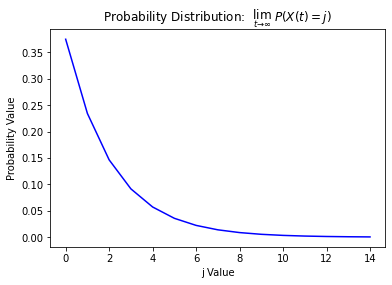

In [ ]:
title = r"Probability Distribution:  $\lim_{t \to \infty}\;P(X(t) = j)$"
plt.title(title)
plt.xlabel('j Value')
plt.ylabel('Probability Value')


plt.plot(Prob,'b')



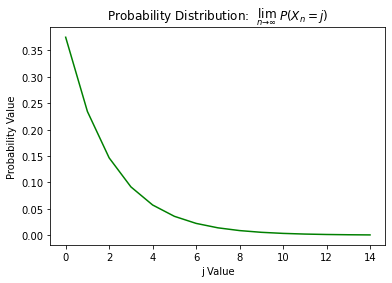

In [ ]:
title = r"Probability Distribution:  $\lim_{n \to \infty}\;P(X_n = j)$"
plt.title(title)
plt.xlabel('j Value')
plt.ylabel('Probability Value')

plt.plot(PiProb,'g')


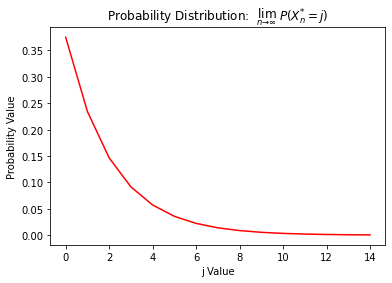

In [ ]:
title = r"Probability Distribution:  $\lim_{n \to \infty}\;P(X^{*}_n = j)$"
plt.title(title)
plt.xlabel('j Value')
plt.ylabel('Probability Value')

plt.plot(PiStarProb,'r')



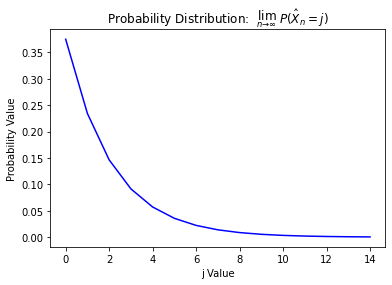

In [ ]:
title = r"Probability Distribution:  $\lim_{n \to \infty}\;P(\hat{X}_n = j)$"
plt.title(title)
plt.xlabel('j Value')
plt.ylabel('Probability Value')

plt.plot(PiHatProb,'b')



## Calculation of $F(x)$ and $W$

$F(x) =  \lim\limits_{n \to \infty} P(W_n ≤ x)$

$F(x) = 1-e^{-(\mu-\lambda)x} \;, x\geq0$

Thus the steady state waiting time is an $exp(\mu − \lambda)$ random variable. Therefore,

$W = E(waiting \; time \; in \; steady \; state) = \frac{1}{\mu-\lambda}$

In [ ]:
WaitingTimeExpectation = 1.0 / (ServiceRate - ArrivalRate)
print("Limiting Expectation of W_n is: %8.4f" %(WaitingTimeExpectation))

Limiting Expectation of W_n is:  13.3333


## Calculation of $L$

$L =  \lim\limits_{t \to \infty}E(X(t))$,

In [ ]:
CustomerNumbersExpectation = 0;

for i in range(1, MaximumBuyers):
   CustomerNumbersExpectation = CustomerNumbersExpectation + i*Prob[i]
   
print("Limiting Expectation of X(t) is: %8.4f" %(CustomerNumbersExpectation))

Limiting Expectation of X(t) is:   1.6522


# Comparison With Ideal Values
 Ideal limiting probability can be obtained using

 $p_j = \rho^j \left(1-\rho \right)$

 Other Probability distributions can be obtained by
$\pi_j = \pi^{*}_j = \hat{\pi}_j = p_j $

$L =  \lim\limits_{t \to \infty}E(X(t))$,

$ L = \frac{\rho}{1-\rho}$

In [ ]:
IdealProb = [0]*MaximumBuyers

for i in range(MaximumBuyers):
  IdealProb[i] = (Rho ** i) * (1-Rho)
  print("Ideal Limiting Probability of X(t) = %d is: %8.4f" %(i, IdealProb[i]))


IdealPiProb = IdealProb[:]
IdealPiStarProb = IdealProb[:]
IdealPiHatProb = IdealProb[:]




Ideal Limiting Probability of X(t) = 0 is:   0.3750
Ideal Limiting Probability of X(t) = 1 is:   0.2344
Ideal Limiting Probability of X(t) = 2 is:   0.1465
Ideal Limiting Probability of X(t) = 3 is:   0.0916
Ideal Limiting Probability of X(t) = 4 is:   0.0572
Ideal Limiting Probability of X(t) = 5 is:   0.0358
Ideal Limiting Probability of X(t) = 6 is:   0.0224
Ideal Limiting Probability of X(t) = 7 is:   0.0140
Ideal Limiting Probability of X(t) = 8 is:   0.0087
Ideal Limiting Probability of X(t) = 9 is:   0.0055
Ideal Limiting Probability of X(t) = 10 is:   0.0034
Ideal Limiting Probability of X(t) = 11 is:   0.0021
Ideal Limiting Probability of X(t) = 12 is:   0.0013
Ideal Limiting Probability of X(t) = 13 is:   0.0008
Ideal Limiting Probability of X(t) = 14 is:   0.0005


# Ideal Vs Calculated Limiting Probability Plots

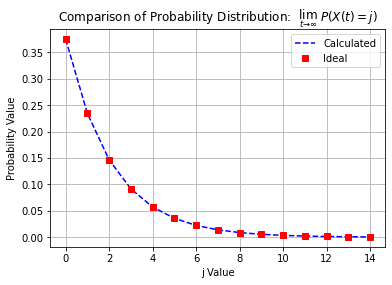

In [ ]:
plt.plot(Prob,'b--',label='Calculated')
plt.plot(IdealProb,'rs',label='Ideal')
title = r"Comparison of Probability Distribution:  $\lim_{t \to \infty}\;P(X(t) = j)$"
plt.title(title)
plt.xlabel('j Value')
plt.ylabel('Probability Value')
plt.grid()
plt.legend()
plt.show()

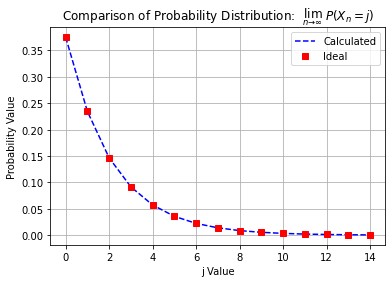

In [ ]:
plt.plot(PiProb,'b--',label='Calculated')
plt.plot(IdealPiProb,'rs',label='Ideal')
title = r"Comparison of Probability Distribution:  $\lim_{n \to \infty}\;P(X_n = j)$"
plt.title(title)
plt.xlabel('j Value')
plt.ylabel('Probability Value')
plt.grid()
plt.legend()
plt.show()


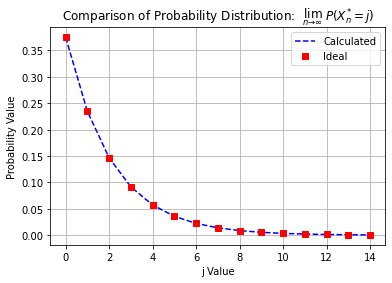

In [ ]:
plt.plot(PiStarProb,'b--',label='Calculated')
plt.plot(IdealPiStarProb,'rs',label='Ideal')
title = r"Comparison of Probability Distribution:  $\lim_{n \to \infty}\;P(X^{*}_n = j)$"
plt.title(title)
plt.xlabel('j Value')
plt.ylabel('Probability Value')
plt.grid()
plt.legend()
plt.show()

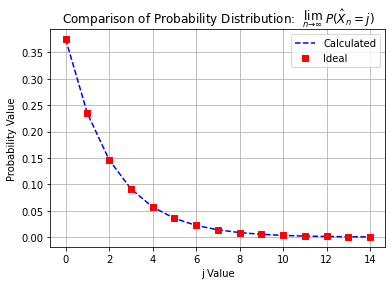

In [ ]:
plt.plot(PiHatProb,'b--',label='Calculated')
plt.plot(IdealPiHatProb,'rs',label='Ideal')
title = r"Comparison of Probability Distribution:  $\lim_{n \to \infty}\;P(\hat{X}_n = j)$"
plt.title(title)
plt.xlabel('j Value')
plt.ylabel('Probability Value')
plt.grid()
plt.legend()
plt.show()

# Comparison of $L$ Value

In [ ]:
L = Rho / (1- Rho)

print("Ideal Limiting Expectation of X(t) is: %8.4f" %(L))
print("Calculated Limiting Expectation of X(t) is: %8.4f" %(CustomerNumbersExpectation))

Ideal Limiting Expectation of X(t) is:   1.6667
Calculated Limiting Expectation of X(t) is:   1.6522


# Verification of Little’s Law for M/M/1 Queue

Little's Law : $ L = \lambda W $

We have $L = CustomerNumbersExpectation = 1.6667$

$ \lambda = ArrivalRate = 0.125 $

and $ W = WaitingTimeExpectation = 13.333 $

Therefore, $\lambda W = 0.125 \times 13.3333 = 1.6667 = L $

Thus Little’s Law is verified for the
M/M/1 queue under FCFS discipline

